In [1]:
import numpy as np, pandas as pd
from glob import glob
from astropy.table import Table
from matplotlib import pyplot as plt, colors as colors, colorbar as cbar
from astroquery.simbad import Simbad
import astropy.coordinates as coord
import astropy.units as u
from WISE_tools import *

%matplotlib inline

In [2]:
good = pd.read_csv('../data/bright_sample/massive.csv.gz')
len(good)

6484

In [3]:
lightcurve_directory = '../data/WISE_lcs/'
source_names = parse_source_names(lightcurve_directory)
print(source_names[0],len(source_names))

J000041.86+554320.8 6484


96 4302.000004188002 45.28421057040002 0.1104999999999996 4.782183058834947


/Volumes/shoobert/Research/UW/GaiaSprintMassive/WISE/code/WISE_tools.py:78: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df = pd.concat(dfs)


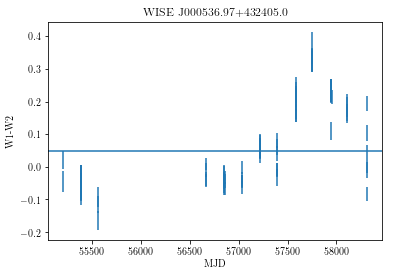

In [4]:
#An illustrative example
lc = get_lightcurve(source_names[4],lightcurve_directory)
N = len(lc)
chi2 = np.sum(((lc['w1w2'].values - np.median(lc['w1w2'].values))**2.0)/(lc['w1w2err'].values**2.0))
redchi2 = chi2/(N-1.0)
MAD = np.median(np.abs(lc['w1w2'].values-np.median(lc['w1w2'].values)))
EWM = np.median(np.abs(lc['w1w2'].values-np.median(lc['w1w2'].values))/lc['w1w2err'].values)
plt.errorbar(lc['mjd'],lc['w1w2'],yerr=lc['w1w2err'],ls='')
plt.axhline(y=np.median(lc['w1w2']))
plt.xlabel('MJD')
plt.ylabel('W1-W2')
plt.title('WISE '+source_names[4])
print(N,chi2,redchi2,MAD,EWM)

```python
Ns = []
w1_chi2s = []
w1_chi2reds = []
w1_MADs = []
w1_EWMs = []
w2_chi2s = []
w2_chi2reds = []
w2_MADs = []
w2_EWMs = []
color_chi2s = []
color_chi2reds = []
color_MADs = []
color_EWMs = []
for i,name in enumerate(source_names):
    lc = get_lightcurve(name,lightcurve_directory)
    full_lc = get_lightcurve(name,lightcurve_directory,clean=False)
    N_full = len(full_lc)
    if N_full == 0:
        print('WISE '+name)
    N = len(lc)
    if N in [0,1]:
        w1_chi2 = np.nan
        w1_chi2red = np.nan
        w1_MAD = np.nan
        w1_EWM = np.nan
        w2_chi2 = np.nan
        w2_chi2red = np.nan
        w2_MAD = np.nan
        w2_EWM = np.nan
        color_chi2 = np.nan
        color_chi2red = np.nan
        color_MAD = np.nan
        color_EWM = np.nan
    else:
        w1_chi2 = np.sum(((lc['w1mpro'].values - np.median(lc['w1mpro'].values))/lc['w1sigmpro'].values)**2.0)
        w1_chi2red = w1_chi2/(N-1.0)
        w1_MAD = np.median(np.abs(lc['w1mpro'].values-np.median(lc['w1mpro'].values)))
        w1_EWM = np.median(np.abs(lc['w1mpro'].values-np.median(lc['w1mpro'].values))/lc['w1sigmpro'].values)
        w2_chi2 = np.sum(((lc['w2mpro'].values - np.median(lc['w2mpro'].values))/lc['w2sigmpro'].values)**2.0)
        w2_chi2red = w2_chi2/(N-1.0)
        w2_MAD = np.median(np.abs(lc['w2mpro'].values-np.median(lc['w2mpro'].values)))
        w2_EWM = np.median(np.abs(lc['w2mpro'].values-np.median(lc['w2mpro'].values))/lc['w2sigmpro'].values)
        color_chi2 = np.sum(((lc['w1w2'].values - np.median(lc['w1w2'].values))/lc['w1w2err'].values)**2.0)
        color_chi2red = color_chi2/(N-1.0)
        color_MAD = np.median(np.abs(lc['w1w2'].values-np.median(lc['w1w2'].values)))
        color_EWM = np.median(np.abs(lc['w1w2'].values-np.median(lc['w1w2'].values))/lc['w1w2err'].values)
    Ns.append(N)
    w1_chi2s.append(w1_chi2)
    w1_chi2reds.append(w1_chi2red)
    w1_MADs.append(w1_MAD)
    w1_EWMs.append(w1_EWM)
    w2_chi2s.append(w2_chi2)
    w2_chi2reds.append(w2_chi2red)
    w2_MADs.append(w2_MAD)
    w2_EWMs.append(w2_EWM)
    color_chi2s.append(color_chi2)
    color_chi2reds.append(color_chi2red)
    color_MADs.append(color_MAD)
    color_EWMs.append(color_EWM)
    if i%100 == 0:
        print(i)
        
variability_df = pd.DataFrame({'WISE_Designation':source_names,'N_obs':Ns,'W1chi2':w1_chi2s,
                              'W1chi2red':w1_chi2reds,'W1_MAD':w1_MADs,'W1_EWM':w1_EWMs,
                               'W2chi2':w2_chi2s,'W2chi2red':w2_chi2reds,'W2_MAD':w2_MADs,
                               'W2_EWM':w2_EWMs,'W1-W2chi2':color_chi2s,
                               'W1-W2chi2red':color_chi2reds,'W1-W2_MAD':color_MADs,
                               r'W1-W2_EWM':color_EWMs})
variability_df.to_csv('first_order_statistics.csv')

#NOTE: TWO STARS DIDN'T HAVE LIGHTCURVES, AND STILL DON'T: WISE J050128.62-701120.2
#WHICH ISN'T A REAL OBJECT AS FAR AS I CAN TELL (nearest SIMBAD source is 8" away)
#AND WISE J074911.48-102000.2 = HD 63554 WHICH JUST DOESN'T HAVE ANYTHING ON IT
```

In [5]:
variability_df = pd.read_csv('first_order_statistics.csv')

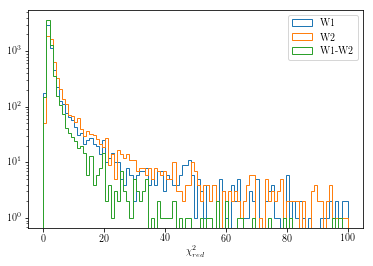

In [6]:
plt.hist(variability_df.dropna()['W1chi2red'],bins=np.linspace(0,100,100),histtype='step',label='W1')
plt.hist(variability_df.dropna()['W2chi2red'],bins=np.linspace(0,100,100),histtype='step',label='W2')
plt.hist(variability_df.dropna()['W1-W2chi2red'],bins=np.linspace(0,100,100),histtype='step',label='W1-W2')
plt.yscale('log')
plt.xlabel(r'$\chi^2_{red}$')
plt.legend()

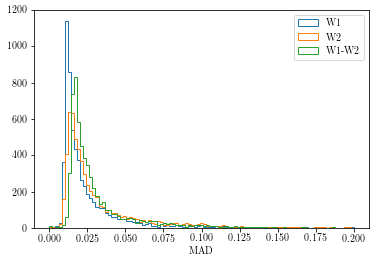

In [7]:
plt.hist(variability_df.dropna()['W1_MAD'],bins=np.linspace(0,0.2,100),histtype='step',label='W1')
plt.hist(variability_df.dropna()['W2_MAD'],bins=np.linspace(0,0.2,100),histtype='step',label='W2')
plt.hist(variability_df.dropna()['W1-W2_MAD'],bins=np.linspace(0,0.2,100),histtype='step',label='W1-W2')
plt.xlabel(r'MAD')
plt.legend()

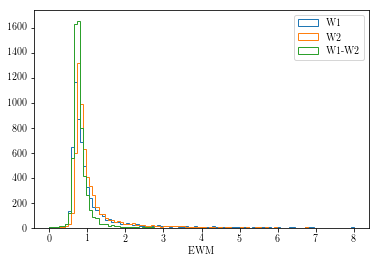

In [8]:
plt.hist(variability_df.dropna()['W1_EWM'],bins=np.linspace(0,8,100),histtype='step',label='W1')
plt.hist(variability_df.dropna()['W2_EWM'],bins=np.linspace(0,8,100),histtype='step',label='W2')
plt.hist(variability_df.dropna()['W1-W2_EWM'],bins=np.linspace(0,8,100),histtype='step',label='W1-W2')
plt.xlabel(r'EWM')
plt.legend()

Text(0, 0.5, '$\\chi^2_{red,W2}$')

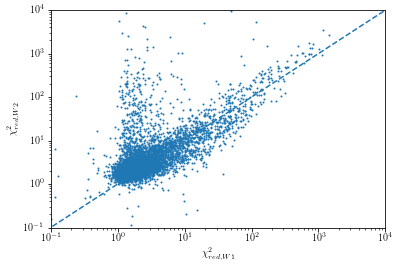

In [9]:
plt.plot([0,10000],[0,10000],ls='--')
plt.scatter(variability_df['W1chi2red'],variability_df['W2chi2red'],s=1)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-1,10000)
plt.ylim(1e-1,10000)
plt.xlabel(r'$\chi^2_{red,W1}$')
plt.ylabel(r'$\chi^2_{red,W2}$')

Text(0, 0.5, 'MAD$_{\\rm W2}$')

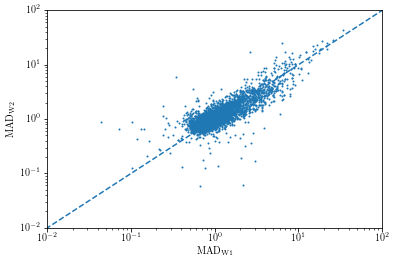

In [10]:
plt.plot([0,100],[0,100],ls='--')
plt.scatter(variability_df['W1_EWM'],variability_df['W2_EWM'],s=1)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-2,100)
plt.ylim(1e-2,100)
plt.xlabel(r'MAD$_{\rm W1}$')
plt.ylabel(r'MAD$_{\rm W2}$')

Text(0, 0.5, 'EWM$_{\\rm W2}$')

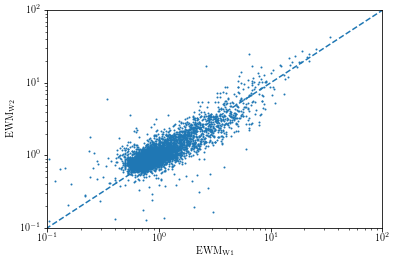

In [11]:
plt.plot([0,100],[0,100],ls='--')
plt.scatter(variability_df['W1_EWM'],variability_df['W2_EWM'],s=1)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-1,100)
plt.ylim(1e-1,100)
plt.xlabel(r'EWM$_{\rm W1}$')
plt.ylabel(r'EWM$_{\rm W2}$')

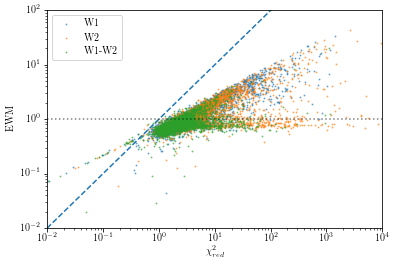

In [12]:
plt.plot([0,10000],[0,10000],ls='--')
plt.scatter(variability_df['W1chi2red'],variability_df['W1_EWM'],s=1,label='W1',alpha=0.5)
plt.scatter(variability_df['W2chi2red'],variability_df['W2_EWM'],s=1,label='W2',alpha=0.5)
plt.scatter(variability_df['W1-W2chi2red'],variability_df['W1-W2_EWM'],s=1,label='W1-W2',alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-2,10000)
plt.ylim(1e-2,100)
plt.xlabel(r'$\chi^2_{red}$')
plt.ylabel(r'EWM')
plt.axhline(y=1,c='k',ls=':',alpha=0.5)
plt.legend()

In [13]:
classification_df = pd.read_csv('classifications.csv')
joined = good.merge(classification_df,on='source_id')
joined = joined.merge(variability_df,left_on='designation',right_on='WISE_Designation')

In [14]:
joined.columns

Index(['BP-RP', 'Galaxy', 'M_G', 'M_W1', 'W1-W2', 'W2-W3', 'W3-W4', 'a_g_val',
       'allwise_oid', 'dec', 'designation', 'original_ext_source_id',
       'parallax', 'parallax_error', 'phot_bp_mean_mag', 'phot_g_mean_mag',
       'phot_rp_mean_mag', 'r_est', 'r_hi', 'r_len', 'r_lo', 'ra', 'source_id',
       'w1mpro', 'w1mpro_error', 'w2mpro', 'w2mpro_error', 'w3mpro',
       'w3mpro_error', 'w4mpro', 'w4mpro_error', 'CommonName_x', 'MKType',
       'SimbadOType', 'SpT', 'Jmag', 'e_Jmag', 'Hmag', 'e_Hmag', 'Kmag',
       'e_Kmag', 'G-J', 'J-H', 'H-K', 'K-W1', 'J-W1', 'Unnamed: 0_x', 'Class',
       'CommonName_y', 'Unnamed: 0_y', 'N_obs', 'W1-W2_EWM', 'W1-W2_MAD',
       'W1-W2chi2', 'W1-W2chi2red', 'W1_EWM', 'W1_MAD', 'W1chi2', 'W1chi2red',
       'W2_EWM', 'W2_MAD', 'W2chi2', 'W2chi2red', 'WISE_Designation'],
      dtype='object')

In [15]:
def cdf(array, norm=True):
    """
    Calculates the cumulative density function of a given array. Default behavior is to
    normalize the CDF for easy comparison between arrays of different sizes
    
    Parameters
    ----------
    array : array-like
        Array to calculate CDF of
        
    norm : bool
        Whether to normalize by the size of array. Default True.
    
    Returns
    -------
    vals : array-like
        Abcissa of density
    density : array-like
        Values of CDF
    
    """
    
    vals = np.sort(array[~np.isnan(array)])
    
    density = np.array([i+1 for i in range(len(vals))])
    
    if norm:
        density = density/len(vals)
        
    mean_dif = np.mean(np.diff(vals))
    
    vals = np.insert(vals, 0, np.min([0,vals[0]-mean_dif]))
    density = np.insert(density, 0, 0)
        
    return vals, density

Text(0, 0.5, 'CDF')

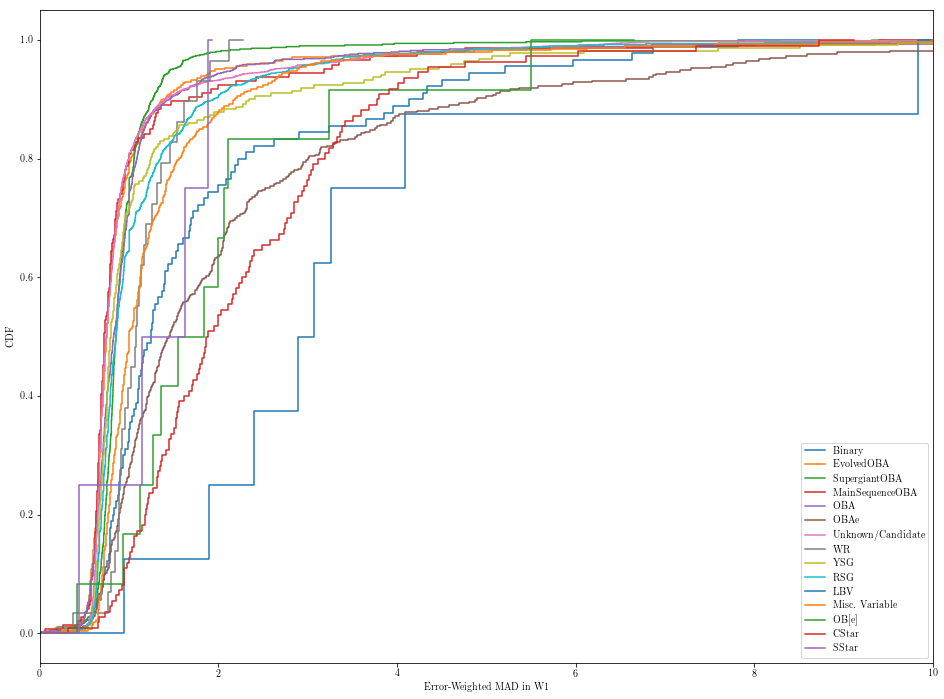

In [16]:
fig = plt.figure(figsize=(16,12))
for i,cl in enumerate(joined['Class'].unique()):
    vals, density = cdf(joined['W1_EWM'][joined['Class']==cl].values)
    plt.step(vals,density,where='mid',label=cl)
plt.legend()
plt.xlim(0,10)
plt.xlabel('Error-Weighted MAD in W1')
plt.ylabel('CDF')

Text(0, 0.5, 'CDF')

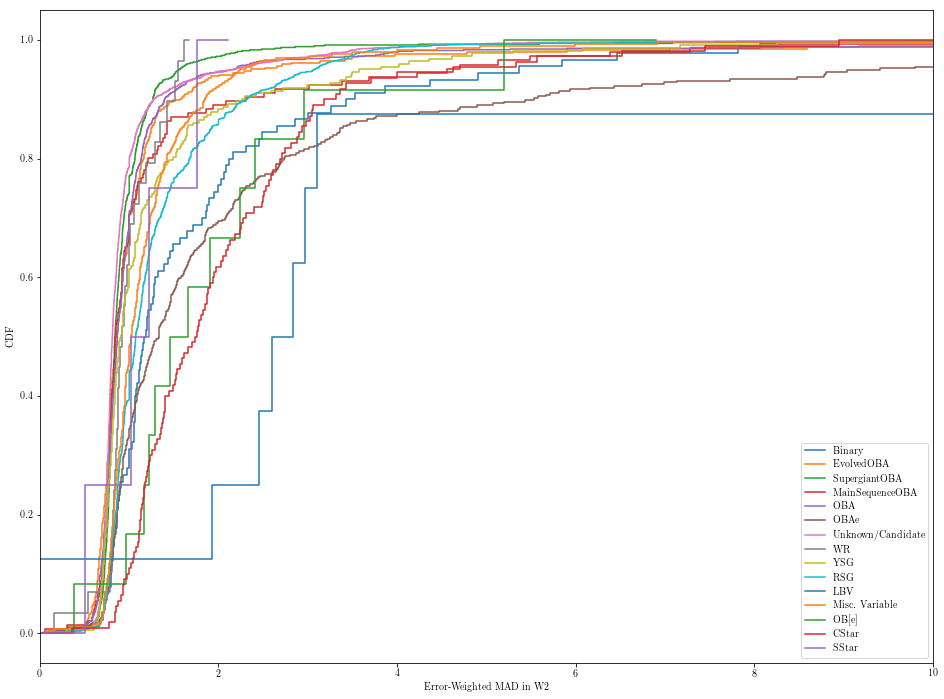

In [17]:
fig = plt.figure(figsize=(16,12))
for i,cl in enumerate(joined['Class'].unique()):
    vals, density = cdf(joined['W2_EWM'][joined['Class']==cl].values)
    plt.step(vals,density,where='mid',label=cl)
plt.legend()
plt.xlim(0,10)
plt.xlabel('Error-Weighted MAD in W2')
plt.ylabel('CDF')

Text(0, 0.5, 'CDF')

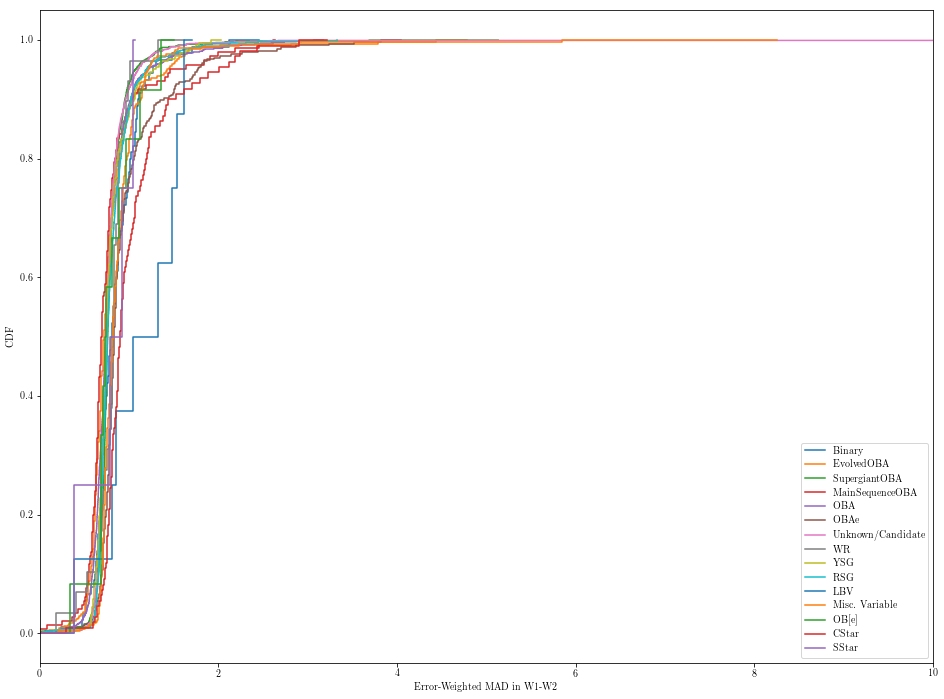

In [18]:
fig = plt.figure(figsize=(16,12))
for i,cl in enumerate(joined['Class'].unique()):
    vals, density = cdf(joined['W1-W2_EWM'][joined['Class']==cl].values)
    plt.step(vals,density,where='mid',label=cl)
plt.legend()
plt.xlim(0,10)
plt.xlabel('Error-Weighted MAD in W1-W2')
plt.ylabel('CDF')

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

training_indices = [c not in np.array(['Binary','Misc. Variable','OBA','Unknown/Candidate']) 
 for c in joined['Class']]
training_data = joined[training_indices].fillna(value=-999)
#training_data = training_data[training_data['W1_EWM']>0.5]
X = training_data[['G-J','J-H','H-K','K-W1','W1-W2','W2-W3','W3-W4','M_G','M_W1','W1chi2red',
                  'W2chi2red','W1-W2chi2red','W1_EWM','W2_EWM','W1-W2_EWM']]
y = training_data['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=np.random.randint(1))

params = {'max_depth': np.arange(2,15,1),'max_features': ['sqrt','log2',None]}
grid = GridSearchCV(DecisionTreeClassifier(), params, cv=4)
grid.fit(X_train, y_train)
    
tree = grid.best_estimator_
#tree = DecisionTreeRegressor(max_depth=5)
max_depth = tree.max_depth
max_features = tree.max_features
print('Decision Tree with max_depth set to :')
print(max_depth)
print('and max_features set to :')
print(max_features)
tree.fit(X,y)
y_check_DT = tree.predict(X_test)

Decision Tree with max_depth set to :
4
and max_features set to :
None


In [113]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          classes=None,
                          figsize=(10,10)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Only use the labels that appear in the data
    if classes is None:
        classes = unique_labels(y_true, y_pred)
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred,labels=classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black",
                    fontsize=8)
    fig.tight_layout()
    fig.figsize = figsize
    return fig,ax

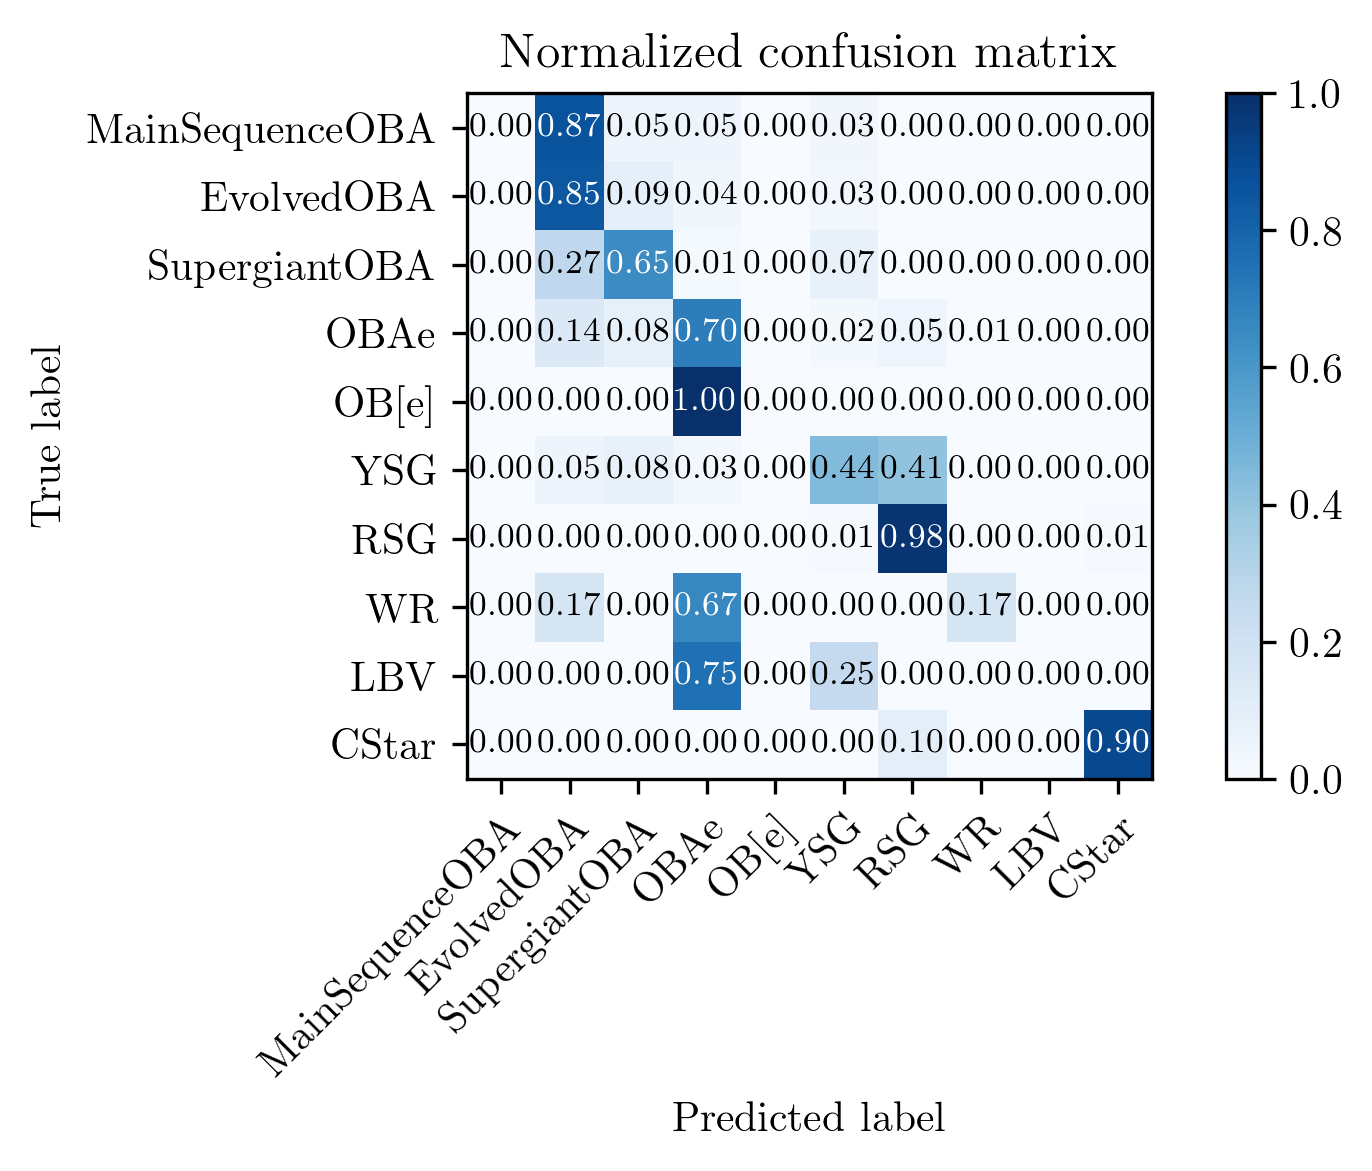

In [123]:
classes = ['MainSequenceOBA','EvolvedOBA','SupergiantOBA','OBAe','OB[e]','YSG',
                   'RSG','WR','LBV','CStar']
fig,ax = plot_confusion_matrix(y_test, y_check_DT,classes=classes,normalize=True);
fig.dpi = 300
plt.savefig('confusion_variability.pdf');

In [124]:
from sklearn.ensemble import RandomForestClassifier
params = {'max_depth': [2,3,4,5,6,7,8,9,10,None],'n_estimators':np.arange(10,110,10),
         'max_features': ['sqrt','log2',None]}

grid = GridSearchCV(RandomForestClassifier(n_jobs=-1), params, cv=4)
grid.fit(X_train, y_train)

forrest = grid.best_estimator_
#tree = DecisionTreeRegressor(max_depth=5)
max_depth = forrest.max_depth
max_features = forrest.max_features
n_estimators = forrest.n_estimators
print('Random Forrest with max_depth set to :')
print(max_depth)
print('max_features set to :')
print(max_features)
print('and n_estimators set to :')
print(n_estimators)
forrest.fit(X,y)
y_check_RF = forrest.predict(X_test)

Random Forrest with max_depth set to :
10
max_features set to :
log2
and n_estimators set to :
90


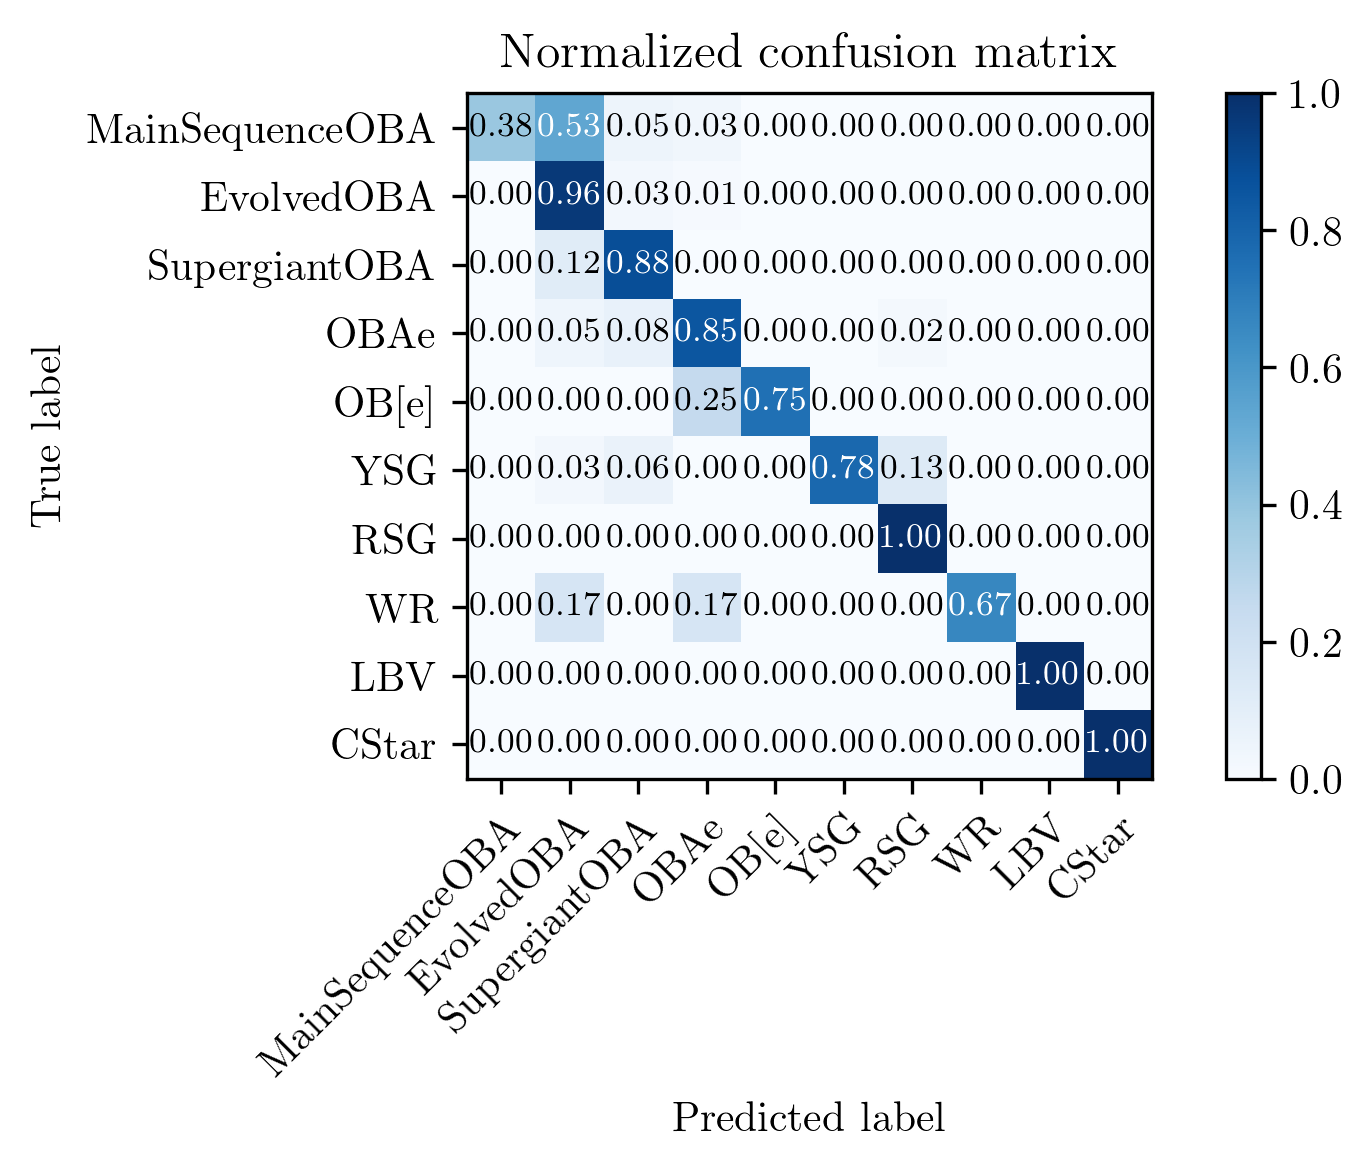

In [125]:
classes = ['MainSequenceOBA','EvolvedOBA','SupergiantOBA','OBAe','OB[e]','YSG',
                   'RSG','WR','LBV','CStar']
fig,ax = plot_confusion_matrix(y_test, y_check_RF,classes=classes,normalize=True);
fig.dpi = 300
plt.savefig('confusion_variability_RF.pdf');

(1, 1000)

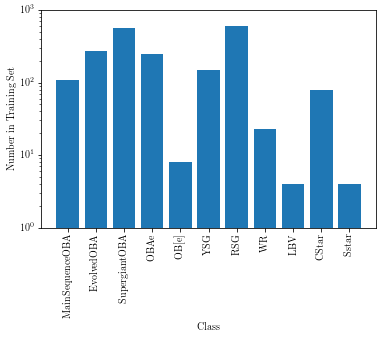

In [142]:
#How many of each class are there in the training and test set?
num_input = []
test_classes = ['MainSequenceOBA','EvolvedOBA','SupergiantOBA','OBAe','OB[e]','YSG',
                   'RSG','WR','LBV','CStar','SStar']
for test_class in test_classes:
    num = len(y_train[y_train == test_class])
    num_input.append(num)
plt.bar(np.arange(len(test_classes)),num_input)
plt.yscale('log')
plt.xticks(ticks=np.arange(len(pred_classes)),labels=pred_classes,rotation='vertical');
plt.xlabel('Class')
plt.ylabel('Number in Training Set')
plt.ylim(1,1000)

(1, 300)

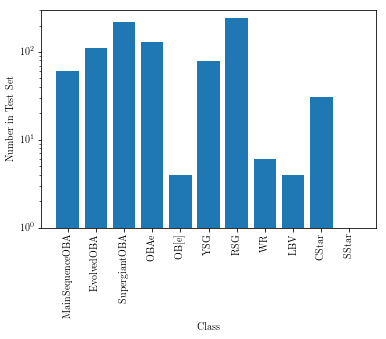

In [143]:
#How many of each class are there in the training and test set?
num_input = []
test_classes = ['MainSequenceOBA','EvolvedOBA','SupergiantOBA','OBAe','OB[e]','YSG',
                   'RSG','WR','LBV','CStar','SStar']
for test_class in test_classes:
    num = len(y_test[y_test == test_class])
    num_input.append(num)
plt.bar(np.arange(len(test_classes)),num_input)
plt.yscale('log')
plt.xticks(ticks=np.arange(len(test_classes)),labels=test_classes,rotation='vertical');
plt.xlabel('Class')
plt.ylabel('Number in Test Set')
plt.ylim(1,300)

In [128]:
unknown_indices = [c in np.array(['Misc. Variable','OBA','Unknown/Candidate']) 
 for c in joined['Class']]
unknowns = joined[unknown_indices].fillna(value=-999)
unknowns_data = unknowns[['G-J','J-H','H-K','K-W1','W1-W2','W2-W3','W3-W4','M_G','M_W1',
                          'W1chi2red','W2chi2red','W1-W2chi2red','W1_EWM','W2_EWM',
                          'W1-W2_EWM']]
unknown_classes = forrest.predict(unknowns_data)

(1, 5000)

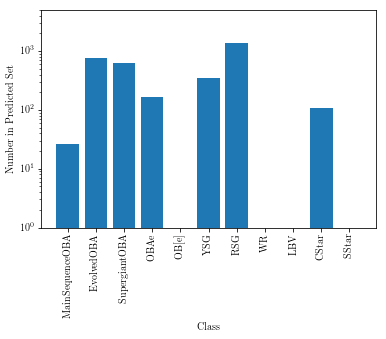

In [144]:
num_output = []
pred_classes = ['MainSequenceOBA','EvolvedOBA','SupergiantOBA','OBAe','OB[e]','YSG',
                   'RSG','WR','LBV','CStar','SStar']
for pred_class in pred_classes:
    num = len(unknown_classes[unknown_classes == pred_class])
    num_output.append(num)
plt.bar(np.arange(len(pred_classes)),num_output)
plt.yscale('log')
plt.xticks(ticks=np.arange(len(pred_classes)),labels=pred_classes,rotation='vertical')
plt.xlabel('Class')
plt.ylabel('Number in Predicted Set')
plt.ylim(1,5000)

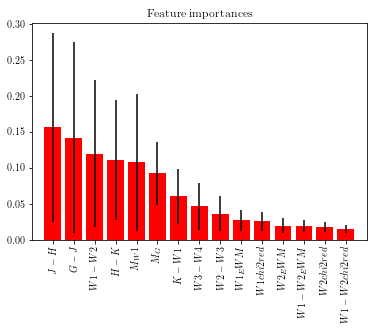

In [137]:
importances = forrest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forrest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
plt.title("Feature importances")
plt.bar(np.arange(len(X.columns[indices])), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(ticks=np.arange(len(X.columns[indices])),labels=['${0}$'.format(name) for name in X.columns[indices]],rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.savefig('feature_importance.pdf')